$$
% transferring macros:
\let\eps\varepsilon
\let\wt\widetilde
\let\tn\mathrm
\let\vphi\varphi
\let\pa\partial
\let\para\parallel
\let\wh\widehat
\let\sl\shoveleft
% defining new macros:
\def\be{\begin{equation} \mskip 1cm}
\def\ee{\end{equation}}
\def\ba{\begin{align} \mskip 1cm}
\def\ea{\end{align}}
\def\RR{{\mathbb R}}
\def\DD{{\mathbb D}}
\def\GG{{\mathbb G}}
\def\CC{{\mathbb C}}
\def\MM{{\mathbb M}}
\def\JJ{{\mathbb J}}
\def\WW{{\mathbb W}}
\def\HH{{\mathbb H}}
\def\SS{{\mathbb S}}
\def\QQ{{\mathbb Q}}
\def\BB{{\mathbb B}}
\def\grad{\tn{grad}\,}
\def\curl{\tn{curl}\,}
\def\unit{\mathbb 1}
\def\div{\tn{div}\,}
\def\Im{\tn{Im}}
% defining new commands:
\newcommand{\abs}[1]{\lvert#1\rvert}
\newcommand{\bold}[1]{{\bf #1}}
\newcommand{\pder}[2]{\frac{\partial #1}{\partial #2}}
\newcommand{\dt}[1]{\frac{\mathrm d #1}{\mathrm dt}}
\newcommand{\ds}[1]{\frac{\mathrm d #1}{\mathrm ds}}
$$

# 1D code for adiabatic electrons with temperature

This is a solver for the 1D limit model and for the truncated model with first order correction. We assume periodic boundary conditions in $x \in [0,L]$ and consider electrostatic potentials $\phi = \phi(t,x)$ with zero spatial average. The potential $\phi$ is either a given function or computed self-consistently from the Poisson equation.

## Limit model 

The limit model for the distribution function $f_0$ reads

$$
\be
 f_0(t,x,v) = \mathcal M_{n_0,0,T_0} =  \frac{c_0(t)}{\sqrt{2\pi T_0(t)}} \exp \left[ -\frac{(v^2 - \phi(t,x))}{T_0(t)} \right]\,,
\ee
$$

where the coefficients $c_0(t)$ and $T_0(t)$ satisfy

$$
\be \label{eqs}
 \dt{} \begin{pmatrix}
  c_0
 \\
  T_0
 \end{pmatrix} = \mathbf G(\phi; c_0, T_0)\,.
\ee
$$

Here, the right-hand side $\mathbf G\in \RR^2$ reads

$$
\be
\mathbf G(\phi; c_0, T_0) = \frac{1}{ \frac{c_0}{2} I^2(1) + \frac{c_0}{T_0^2} I(1) I(\phi^2) - \frac{c_0}{T_0^2} I^2(\phi) }
 \begin{pmatrix}
 \frac{c_0}{2} I(1) + \frac{c_0}{T_0^2} I(\phi^2) & \frac{c_0}{T_0^2} I(\phi)
 \\[1mm]
 I(\phi) & I(1)
 \end{pmatrix} \begin{pmatrix}
 -\frac{c_0}{T_0} I \left( \pder{\phi}{t} \right)
 \\[1mm]
 \frac{c_0}{T_0} I \left( \pder{}{t}\frac{\phi^2}{2} \right)
 \end{pmatrix}\,,
\ee
$$

where, for any function $\psi = \psi(t,x)$, we defined the integrals

$$
\be
 I(\psi) = I(\psi)(t) := \int_0^L \psi(t,x)\, \exp \left[ \frac{ \phi(t,x)}{T_0(t)} \right] \,\tn d x\,.
\ee
$$

## Runge-Kutta methods

We will solve \eqref{eqs} with explicit Runge-Kutta (RK) methods of various orders:

$$
\be
 \begin{pmatrix}
  c_0^{n+1}
 \\[0mm]
  T_0^{n+1}
 \end{pmatrix} = 
 \begin{pmatrix}
  c_0^n
 \\[0mm]
  T_0^n
 \end{pmatrix} + \Delta t \sum_{i=1}^s b_i \mathbf k_i\,,\qquad \mathbf k_i = \mathbf G \left( \phi(t_n + d_i \Delta t) ;\ c_0^n + \Delta t \sum_{j=1}^s a_{i,j}\, k_{j,1},\ T_0^n + \Delta t \sum_{j=1}^s a_{i,j}\, k_{j,2}\right)\,.
\ee
$$

The following Butcher tables will be used:

$$
\begin{array}{c|c}
 0 & 0 
 \\
 \hline
 & 1
\end{array}\,,\qquad
\begin{array}{c|cc}
 0 & 0 &
 \\
 1 & 1 & 0
 \\
 \hline
 & \frac{1}{2} & \frac{1}{2} 
\end{array}\,,\qquad
\begin{array}{c|ccc}
 0 & 0 & &
 \\
 \frac{1}{2} & \frac{1}{2} & 0 &
 \\
 1 & -1 & 2 & 0
 \\
 \hline
 & \frac{1}{6} & \frac{4}{3} & \frac{1}{6}
\end{array}\,,\qquad
\begin{array}{c|cccc}
 0 & 0 &  & &
 \\
 \frac{1}{2} & \frac{1}{2} & 0 & &
 \\
 \frac{1}{2} & 0 & \frac{1}{2} & 0 &
 \\
 1 & 0 & 0 & 1 & 0
 \\
 \hline
 & \frac{1}{6} & \frac{1}{3} & \frac{1}{3} & \frac{1}{6}
\end{array}
$$

__First order method (forward Euler):__

$$
\be
 \mathbf k_1 =  \mathbf G \left(\phi(t_n);\ c_0^n,\ T_0^n \right)\,.
\ee
$$

__Second order method (improved Euler method):__

$$
\ba
 \mathbf k_1 &=  \mathbf G \left( \phi(t_n);\ c_0^n,\ T_0^n  \right)\,,
 \\[2mm]
 \mathbf k_2 &= \mathbf G \left( \phi(t_n + \Delta t);\ c_0^n + \Delta t \, k_{1,1},\ T_0^n + \Delta t \, k_{1,2} \right)\,.
\ea
$$

__Third order method (Kutta's third order rules):__

$$
\ba
 \mathbf k_1 &=  \mathbf G \left( \phi(t_n);\ c_0^n,\ T_0^n \right)\,,
 \\[2mm]
 \mathbf k_2 &= \mathbf G \left( \phi \left(t_n + \frac{1}{2} \Delta t \right);\ c_0^n + \frac{1}{2}\Delta t\, k_{1,1},\ T_0^n + \frac{1}{2}\Delta t \, k_{1,2} \right)\,,
 \\[2mm]
 \mathbf k_3 &= \mathbf G \left(  \phi(t_n + \Delta t);\ c_0^n - \Delta t \, k_{1,1} + 2\Delta t \, k_{2,1},\ T_0^n - \Delta t \, k_{1,2} + 2 \Delta t \, k_{2,2} \right)\,.
\ea
$$

__Fourth order method (standard RK):__

$$
\ba
 \mathbf k_1 &=  \mathbf G \left( \phi(t_n);\ c_0^n,\ T_0^n  \right)\,,
 \\[2mm]
 \mathbf k_2 &= \mathbf G \left( \phi\left(t_n + \frac{1}{2} \Delta t \right);\ c_0^n + \frac{1}{2}\Delta t \, k_{1,1},\ T_0^n + \frac{1}{2}\Delta t \, k_{1,2} \right)\,,
 \\[2mm]
 \mathbf k_3 &= \mathbf G \left( \phi\left(t_n + \frac{1}{2} \Delta t\right);\ c_0^n + \frac{1}{2}\Delta t \, k_{2,1},\ T_0^n + \frac{1}{2}\Delta t \, k_{2,2} \right)\,,
 \\[2mm]
 \mathbf k_4 &= \mathbf G \left( \phi(t_n + \Delta t) ;\ c_0^n + \Delta t \, k_{3,1},\ T_0^n + \Delta t \, k_{3,2}\right)\,.
\ea
$$

In [1]:
# import libraries:

%matplotlib notebook
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy import integrate
import time

In [2]:
def k_maker(phi, dt_phi, t, c0, T0):

    ufun = lambda x: 1
    
    def w_mean(psi, t, T0):
        func = lambda x: psi(x)*np.exp(phi(t, x)/T0)
        return integrate.quad(func, a, b)[0]
        # The integral function I(psi)

    I_1 = w_mean(ufun, t, T0)

    phi_x = lambda x: phi(t, x) 
    I_phi = w_mean(phi_x, t, T0)
    
    phi2_x = lambda x: phi(t, x)**2 
    I_phi2 = w_mean(phi2_x, t, T0)

    dt_phi_x = lambda x: dt_phi(t, x) 
    I_dt_phi = w_mean(dt_phi_x, t, T0)

    prod_x = lambda x: dt_phi(t, x)*phi(t, x) 
    I_prod = w_mean(prod_x, t, T0)

    det = c0/2*I_1**2 + c0/T0**2*I_1*I_phi2 - c0/T0**2*I_phi**2
    mat = np.zeros((2, 2))
    vec = np.zeros(2)

    mat[0][0] = c0/2*I_1 + c0/T0**2*I_phi2
    mat[1][0] = I_phi
    mat[0][1] = c0/T0**2*I_phi
    mat[1][1] = I_1

    vec[0] = -c0/T0*I_dt_phi
    vec[1] = c0/T0*I_prod

    return mat.dot(vec) 

In [3]:
def G_maker(phi_vec, dt_phi_vec, dx):

    # callable:
    def Gfun(cc, TT):
        
        # integrals for the rhs:
        I_1 = dx*np.sum(np.exp(phi_vec/TT))
        I_phi = dx*np.sum(phi_vec*np.exp(phi_vec/TT))
        I_phi2 = dx*np.sum(phi_vec**2*np.exp(phi_vec/TT))
        I_dt_phi = dx*np.sum(dt_phi_vec*np.exp(phi_vec/TT))
        I_prod = dx*np.sum(phi_vec*dt_phi_vec*np.exp(phi_vec/TT))
        
        det = cc/2*I_1**2 + cc/TT**2*I_1*I_phi2 - cc/TT**2*I_phi**2
        mat = np.zeros((2, 2))
        vec = np.zeros(2)

        mat[0][0] = cc/2*I_1 + cc/TT**2*I_phi2
        mat[1][0] = I_phi
        mat[0][1] = cc/TT**2*I_phi
        mat[1][1] = I_1

        vec[0] = -cc/TT*I_dt_phi
        vec[1] = cc/TT*I_prod
        
        print('Integrals: ', I_1, I_phi, I_phi2, I_dt_phi, I_prod)

        return mat.dot(vec) 
    
    return Gfun

<IPython.core.display.Javascript object>


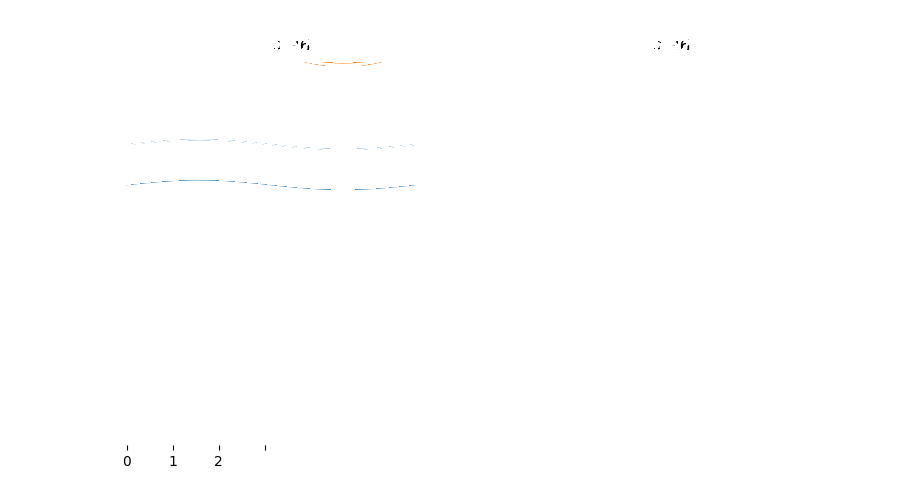

KeyboardInterrupt: 

In [8]:
Nt_list = [250]
n0_list = [] 
dt_arr = np.zeros(len(Nt_list))
dx_arr = np.zeros(len(Nt_list))

i = -1
for Nt in Nt_list:
    
    i += 1
    
    a = 0
    b = 2*np.pi
    Nel = 32
    dx = (b-a)/Nel
    x_vec = np.linspace(a, b, Nel + 1) 
    dx_arr[i] = dx
    # the spatial domain
    
    # Matrix for Poisson solver:
    A_d = np.diag(2*np.ones(Nel))
    A_p = np.diag(-1*np.ones(Nel - 1), 1)
    A_m = np.diag(-1*np.ones(Nel - 1), -1)
    A_Poisson = (A_d + A_p + A_m)/dx**2
    A_Poisson[0, -1] = -1/dx**2
    A_Poisson[-1, 0] = -1/dx**2
    A_nl = A_Poisson + np.identity(Nel)

    v_min = -5
    v_max = 5
    Nv = 64
    dv = (v_max - v_min)/Nv
    v_vec = np.linspace(v_min, v_max, Nv + 1)
    # velocity domain
    
    t_0 = 0
    t_Nt = 10
    dt = (t_Nt - t_0)/Nt
    t_vec = np.linspace(t_0, t_Nt, Nt + 1)
    dt_arr[i] = dt
    # the time domain
    
    om = 2*np.pi
    eps = 1e-1
    phi_fun = lambda x, t: eps*np.cos(x)*np.sin(om*t)
    dt_phi_fun = lambda x, t: om*eps*np.cos(x)*np.cos(om*t)
    phi_vec = phi_fun(x_vec, 0)
    dt_phi_vec = dt_phi_fun(x_vec, 0)
    # electrostatic potential and its time derivative at initial time

    c0 = 1.0
    T0 = 1.0
    n0 = c0*np.exp(phi_vec / T0 )
    n0_mat = np.zeros((Nt + 1, Nel + 1))
    n0_mat[0, :] = n0
    # initial density
    
    #######################
    ### Runge-Kutta scheme:
    #######################
    RK_order = 1

    c0_time = np.array(c0)
    T0_time = np.array(T0)

    fig = plt.figure(1, figsize=(9,5))
    ax = plt.subplot(121)
    line1, = plt.plot(x_vec, phi_vec, label='potential')
    line2, = plt.plot(x_vec, n0 - 1, label='$c_0\,e^{\phi/T_0} - 1$')
    line3, = plt.plot(x_vec, n0 - 1, label='new model')
    plt.legend(loc=1)
    plt.xlabel('x')
    plt.ylabel('a.u.')
    plt.title('Before start')
    plt.ylim([-eps*2, eps*2])
    
    ax2 = plt.subplot(122)
    line4, = plt.plot(x_vec, dt_phi_vec, label='$\partial_t \phi$')
    plt.legend(loc=1)
    plt.xlabel('x')
    plt.ylabel('a.u.')
    plt.ylim([-eps*2, eps*2])
    
    fig.canvas.draw()
    # showing the initial potential and density
    
    j = 0
    for t in t_vec[:-1]:
        
        j += 1

        if False:
        
            phi_vec = phi_fun(x_vec, t)
            dt_phi_vec = dt_phi_fun(x_vec, t)
            
            phi_vec_mid = phi_fun(x_vec, t + dt/2)
            dt_phi_vec_mid = dt_phi_fun(x_vec, t + dt/2)
            
            phi_vec_new = phi_fun(x_vec, t + dt)
            dt_phi_vec_new = dt_phi_fun(x_vec, t + dt)
            
            # update the coefficients c0, T0:
            if RK_order == 1:

                Gfun = G_maker(phi_vec[:-1], dt_phi_vec[:-1], dx)

                k_1 = Gfun(c0, T0)

                c0 += dt*k_1[0]
                T0 += dt*k_1[1]
                
                print(c0, T0)

            elif RK_order == 2:

                # first stage:
                Gfun = G_maker(phi_vec[:-1], dt_phi_vec[:-1], dx)

                k_1 = Gfun(c0, T0)

                c1 = c0 + dt*k_1[0]
                T1 = T0 + dt*k_1[1]

                Gfun = G_maker(phi_vec_new[:-1], dt_phi_vec_new[:-1], dx)

                k_2 = Gfun(c1, T1)

                # update:
                c0 += dt/2*k_1[0] + dt/2*k_2[0]
                T0 += dt/2*k_1[1] + dt/2*k_2[1]

            elif RK_order == 3:

                # first stage:
                Gfun = G_maker(phi_vec[:-1], dt_phi_vec[:-1], dx)

                k_1 = Gfun(c0, T0)

                c1 = c0 + dt/2*k_1[0]
                T1 = T0 + dt/2*k_1[1]

                Gfun = G_maker(phi_vec_mid[:-1], dt_phi_vec_mid[:-1], dx)

                k_2 = Gfun(c1, T1)

                c2 = c0 - dt*k_1[0] + 2*dt*k_2[0]
                T2 = T0 - dt*k_1[1] + 2*dt*k_2[1]

                Gfun = G_maker(phi_vec_new[:-1], dt_phi_vec_new[:-1], dx)

                k_3 = Gfun(c2, T2)

                # update:
                c0 += dt/6*k_1[0] + 4*dt/3*k_2[0] + dt/6*k_3[0]
                T0 += dt/6*k_1[1] + 4*dt/3*k_2[1] + dt/6*k_3[1]

            elif RK_order == 4:
            
                # first stage:
                Gfun = G_maker(phi_vec[:-1], dt_phi_vec[:-1], dx)

                k_1 = Gfun(c0, T0)

                c1 = c0 + dt/2*k_1[0]
                T1 = T0 + dt/2*k_1[1]

                Gfun = G_maker(phi_vec_mid[:-1], dt_phi_vec_mid[:-1], dx)

                k_2 = Gfun(c1, T1)

                c2 = c0 + dt/2*k_2[0]
                T2 = T0 + dt/2*k_2[1]

                k_3 = Gfun(c2, T2)

                c3 = c0 + dt*k_3[0]
                T3 = T0 + dt*k_3[1]

                Gfun = G_maker(phi_vec_new[:-1], dt_phi_vec_new[:-1], dx)

                k_4 = Gfun(c3, T3)

                # update:
                c0 += dt/6*k_1[0] + dt/3*k_2[0] + dt/3*k_3[0] + dt/6*k_4[0]
                T0 += dt/6*k_1[1] + dt/3*k_2[1] + dt/3*k_3[1] + dt/6*k_4[1]
                
            c0_time = np.append(c0_time, c0)
            T0_time = np.append(T0_time, T0)

            n0 = c0*np.exp(phi_vec_new/T0 )
            n0_mat[j :] = n0
            
        else:

            # fixed-point iteration:
            res = 1.
            tol = 1e-6
            n0_new = n0[:-1]
            phi_old = np.zeros(np.shape(n0_new))
            k = 0
            while res > tol:
                
                rho = 1 + eps*np.sin(x_vec[:-1]) - n0_new + phi_old
                #rho = 1. - n0_new + phi_old
                # right-hand side
                
                phi_new = np.linalg.solve(A_nl, rho)
                n0_new = c0*np.exp(phi_new / T0 )
                res = np.linalg.norm(phi_new - phi_old, ord=np.inf)
                phi_old = phi_new
                
                k += 1
                #print('Fixed point iteration: ', k, res)
                
            #print('Fixed point iteration: ', k, res)
        
            dt_phi_vec[:-1] = (phi_new - phi_vec[:-1])/dt
            dt_phi_vec[-1] = dt_phi_vec[0]
            phi_vec[:-1] = phi_new
            phi_vec[-1] = phi_vec[0]
            
            I_1 = dx*np.sum(np.exp(phi_vec[:-1]/T0))
            I_phi = dx*np.sum(phi_vec[:-1]*np.exp(phi_vec[:-1]/T0))
            I_phi2 = dx*np.sum(phi_vec[:-1]**2*np.exp(phi_vec[:-1]/T0))
            I_dt_phi = dx*np.sum(dt_phi_vec[:-1]*np.exp(phi_vec[:-1]/T0))
            I_prod = dx*np.sum(phi_vec[:-1]*dt_phi_vec[:-1]*np.exp(phi_vec[:-1]/T0))
            
            #print('Integrals: ', I_1, I_phi, I_phi2, I_dt_phi, I_prod)

            det = c0/2*I_1**2 + c0/T0**2*I_1*I_phi2 - c0/T0**2*I_phi**2
            mat = np.zeros((2, 2))
            vec = np.zeros(2)
            
            #print('determinant: ', det)

            mat[0][0] = c0/2*I_1 + c0/T0**2*I_phi2
            mat[1][0] = I_phi
            mat[0][1] = c0/T0**2*I_phi
            mat[1][1] = I_1

            vec[0] = -c0/T0*I_dt_phi
            vec[1] = c0/T0*I_prod

            k_1 = mat.dot(vec)/det 
            
            #print('k_1: ', k_1[0], k_1[1])

            c0 += dt*k_1[0]
            T0 += dt*k_1[1]
            
            #print(dt_phi_vec)
            #print('updated values: ', c0, T0)
            #print()
            
            c0_time = np.append(c0_time, c0)
            T0_time = np.append(T0_time, T0)

            n0 = c0*np.exp(phi_vec/T0 )
            n0_mat[j :] = n0
        
        
        line1.set_ydata( phi_vec )
        line2.set_ydata( 1*np.exp(phi_vec/1) - 1 )
        line3.set_ydata( n0 - 1 )
        line4.set_ydata( dt_phi_vec )
        ax.set(title='t = ' + str(t))
        ax2.set(title='t = ' + str(t))
        fig.canvas.draw()
        #time.sleep(5)
        
        
    n0_list.append(n0_mat)
        
    fig, ax = plt.subplots(1, 1, figsize=(6, 4))
    line1, = ax.plot(t_vec, c0_time, label='$c_0$')
    line1, = ax.plot(t_vec, T0_time, label='$T_0$')
    ax.legend(loc=1)
    ax.grid()
    ax.set(xlabel='time')
    ax.set(ylabel='a.u.')
    ax.set(title='RK-order ' + str(RK_order) + ', $\Delta t = $' +str(dt))
    fig.canvas.draw()
    
    spec = np.fft.fft(T0_time - np.mean(T0_time))
    freqs = np.fft.fftfreq(len(T0_time))
    fig, ax = plt.subplots(1, 1, figsize=(6, 4))
    line, = ax.plot(np.arange(len(T0_time))[0:70]/Nt/dt, np.abs(spec)[0:70], label='Freq. Spec.')
    ax.legend(loc=1)
    ax.set(title='RK-order ' + str(RK_order) + ', $\Delta t = $' +str(dt))
    fig.canvas.draw()

In [ ]:
line1

In [ ]:
np.linalg.eig?

In [ ]:
np.linalg.eig(A_Poisson)[0]

In [ ]:
L2_error = np.zeros(len(Nt_list) - 1)

for i in range(len(Nt_list) - 1):
    
    brdcst = 2**(len(Nt_list) - 1 - i)
    sol_h = np.repeat(n0_list[i][1:, :], brdcst, 0) 
    brdcst = 2**(len(Nt_list) - 1 - (i + 1))
    sol_h2 = np.repeat(n0_list[i + 1][1:, :], brdcst, 0) 
    
    L2_error[i] = dt_arr[i]*dx_arr[i]*np.sum(np.abs(sol_h - sol_h2)**2)
    
    print(L2_error[i])


In [ ]:
gaussian = lambda v: np.exp(-v**2/(2*T0)) / np.sqrt(2*np.pi*T0)
# homogeneous Maxwellian

fig, ax = plt.subplots(1, 1, figsize=(6, 4))
line1, = ax.plot(v_vec, gaussian(v_vec), label='Gaussian')
ax.legend()